In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [11]:
# Data through 2017
run1 = RunManager('StatArbStrategy', 'run_0091', test_periods=5)
drop_params = [('holding_period', 5), ('holding_period', 7)]
run2 = RunManager('StatArbStrategy', 'run_0092', test_periods=5, drop_params=drop_params)

In [12]:
run1.import_return_frame()
run2.import_return_frame()

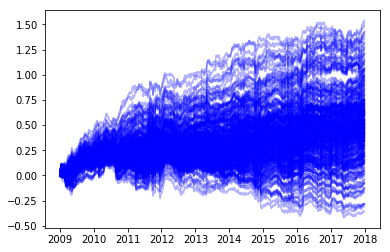

In [16]:
plt.figure()
plt.plot(run2.returns.cumsum(), 'b', alpha=0.3)
plt.show()

In [14]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,312,0.364091,0.027153,-999.0
1,holding_period,5,312,0.352376,0.027008,-999.0
2,holding_period,7,312,0.337330,0.026691,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",468,0.439595,0.033048,-999.0
4,model,{u'type': u'reg'},468,0.262937,0.020853,-999.0
5,per_side_count,10,312,0.426007,0.030466,-999.0
6,per_side_count,20,312,0.416585,0.037747,-999.0
7,per_side_count,5,312,0.211205,0.012639,-999.0
8,response_days,10,468,0.352808,0.027152,-999.0
9,response_days,5,468,0.349723,0.026749,-999.0


In [15]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,312,0.533284,0.036714,-999.0
1,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",156,0.701368,0.048181,-999.0
2,model,{u'type': u'reg'},156,0.365201,0.025247,-999.0
3,per_side_count,10,104,0.554053,0.038204,-999.0
4,per_side_count,20,104,0.445084,0.040949,-999.0
5,per_side_count,5,104,0.600715,0.030990,-999.0
6,response_days,10,156,0.540868,0.037404,-999.0
7,response_days,5,156,0.525700,0.036025,-999.0
8,response_type,Simple,312,0.533284,0.036714,-999.0
9,score_var,boll2_40,24,0.016441,0.003262,-999.0


## ComboSearch

In [8]:
comb1 = CombinationSearch()
comb1.add_run(run1)
comb1.params['training_epochs'] = 10
comb1.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [02:34<00:00, 17.52s/it]


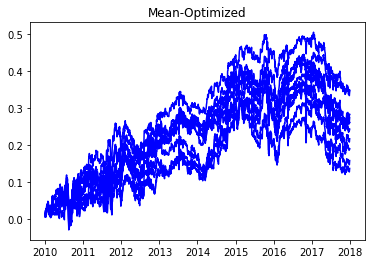

In [10]:
plt.figure()
plt.plot(comb1.best_results_returns.cumsum(), 'b')
plt.title('Mean-Optimized')
plt.show()

## Sector 45

In [26]:
comb2 = CombinationSearch()
comb2.add_run(run2)
comb2.params['training_epochs'] = 10
comb2.start()

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [01:41<00:00, 10.08s/it]


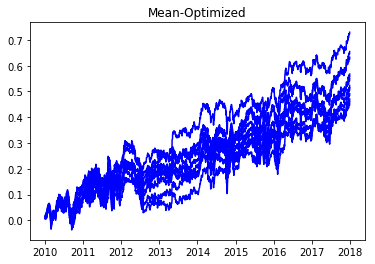

In [19]:
plt.figure()
plt.plot(comb2.best_results_returns.cumsum(), 'b')
plt.title('Mean-Optimized')
plt.show()

In [27]:
df = rollup_returns(comb2.best_results_returns)
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.011263,0.055953,-0.017724,0.082855,0.132347
2011,0.061709,-0.046077,-0.008462,0.057396,0.064566
2012,0.070975,-0.065555,-0.013080,0.023757,0.016096
2013,-0.017220,0.027584,0.028463,0.025128,0.063955
2014,0.076249,-0.007097,-0.037912,0.032813,0.064052
2015,0.022035,0.026630,-0.033712,0.070378,0.085331
2016,0.046463,0.031641,0.012474,-0.042012,0.048566
2017,0.036934,-0.032319,0.099551,0.075964,0.180131


In [28]:
comb2s = CombinationSearch()
comb2s.add_run(run2)
comb2s.params['training_epochs'] = 10
comb2s.set_selection_criteria('sharpe')
comb2s.start()

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [01:53<00:00, 11.44s/it]


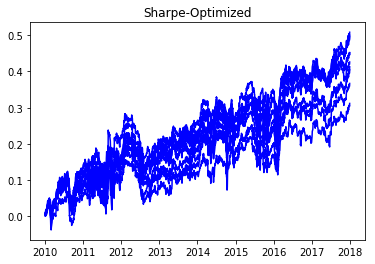

In [29]:
plt.figure()
plt.plot(comb2s.best_results_returns.cumsum(), 'b')
plt.title('Sharpe-Optimized')
plt.show()

In [30]:
df = rollup_returns(comb2s.best_results_returns)
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.039230,0.041245,-0.043059,0.043100,0.080516
2011,0.033057,-0.019357,0.001875,0.057817,0.073392
2012,0.034767,-0.069025,-0.033592,0.041265,-0.026585
2013,-0.010767,0.012629,0.025414,0.011774,0.039049
2014,0.058484,-0.004476,-0.031797,-0.002296,0.019915
2015,0.020484,0.005292,-0.048964,0.036797,0.013609
2016,0.065879,0.019788,0.007672,-0.009658,0.083681
2017,0.032135,-0.002754,0.051436,0.048710,0.129527


In [35]:
stats2s = get_stats(comb2s.best_results_returns.dropna())

In [ ]:
stats2s.loc[:, 'Sharpe']